In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and di

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
#plt.rc('font', family='AppleGothic')   # MacOS font
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

## 1. 데이터 수집 및 전처리, 시각화
(1) [서울 열린 데이터 광장](https://data.seoul.go.kr/) 
* 서울시 한국여행중 서울지역 방문지(성별연령별방문목적방문횟수)통계(수집기간:  2012년도~2019년도)
* 서울시 한국여행중 서울지역 방문지(월별)통계 (수집기간:  2012년도~2019년도)

(2) 웹크롤링으로 수집
* [visit Seoul](https://korean.visitseoul.net/attractions): 관광지 인기 평점 (트립어드바이저 정보. 240건 수집 (관광지명, 평점, 주소)
* [인스타그램](https://www.instagram.com/): 목적별 키워드 수집

### 1-1.서울지역 방문지(성별연령별방문목적방문횟수) 데이터 전처리 및 시각화

#### 1-0.데이터 불러오기

In [2]:
new_df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/report1_12_13.txt', sep='\t',encoding='utf8', header=1,names=['기간','구분','구분2','서울방문','명동','동대문시장','남대문시장','고궁','남산','인사동','박물관','롯데월드','이태원','홍대'])
new_df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/report_14_17.txt', sep='\t',encoding='utf8',header=1,names=['기간','구분','구분2','서울방문','명동','동대문시장','남대문시장','고궁','남산','인사동','박물관','롯데월드','홍대','강남역','이태원'])
new_df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/report_18.txt', sep='\t',encoding='utf8',header=1,names=['기간','구분','구분2','서울방문','명동','동대문시장','인사동','홍대','강남역','이태원','롯데월드','코엑스','광화문','유람선','가로수길']) 
new_df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/report_19.txt', sep='\t',encoding='utf8',header=1,names=['기간','구분','구분2','서울방문','명동','동대문시장','인사동','홍대','강남역','이태원','롯데월드','코엑스','광화문','유람선','가로수길'])

In [3]:
new_df1.head()

기간   구분     구분2  서울방문    명동  동대문시장  ...    남산   인사동   박물관  롯데월드   이태원    홍대
0  2012   전체      전체  82.5  74.5   59.4  ...  35.0  31.7  27.1  28.2  21.4  20.0
1  2012   성별      남성  76.6  63.2   52.0  ...  34.4  29.4  30.1  25.8  23.9  15.2
2  2012   성별      여성  87.9  83.6   65.3  ...  35.5  33.5  24.8  30.2  19.4  23.9
3  2012  연령별  15~20세  94.7  88.9   78.0  ...  39.4  24.3  32.0  52.5  18.7  32.5
4  2012  연령별  21~30세  91.4  82.1   69.1  ...  42.9  36.0  30.4  36.1  26.7  32.1

[5 rows x 14 columns]

In [4]:
new_df2.head()

기간   구분     구분2  서울방문    명동  동대문시장  ...   인사동   박물관  롯데월드    홍대   강남역 이태원
0  2014   전체      전체  80.4  77.6   61.9  ...  30.3  21.9  23.6  29.9  22.9   -
1  2014   성별      남성  75.6  65.8   55.3  ...  26.8  22.6  21.6  24.5  25.1   -
2  2014   성별      여성  84.3  86.2   66.8  ...  32.9  21.4    25  33.8  21.3   -
3  2014  연령별  15~20세  95.0  86.4   66.4  ...  34.2  28.2  37.5  44.2  24.7   -
4  2014  연령별  21~30세  83.7  86.3   69.6  ...  35.7  23.4  28.3  42.9  25.4   -

[5 rows x 15 columns]

In [5]:
new_df3.head()

기간   구분     구분2  서울방문    명동  동대문시장  ...   이태원  롯데월드   코엑스   광화문   유람선  가로수길
0  2018   전체      전체  79.4  88.2   61.0  ...  23.8  22.4  12.4  11.5  10.9   9.5
1  2018   성별      남성  75.3  81.9   53.4  ...  23.6  21.6  12.9  11.3  10.9   5.7
2  2018   성별      여성  82.5  92.5   66.2  ...  24.0  22.9  12.1  11.7  10.9  12.2
3  2018  연령별  15~20세  92.0  94.5   64.4  ...  33.2  29.3  19.2  14.2  18.4  18.9
4  2018  연령별  21~30세  82.7  91.6   64.1  ...  29.5  24.4  14.1  12.4  13.2  12.7

[5 rows x 15 columns]

In [6]:
new_df4.head()

기간   구분     구분2  서울방문    명동  동대문시장  ...   이태원  롯데월드   코엑스   광화문   유람선  가로수길
0  2019   전체      전체  76.4  88.2   58.4  ...  22.0  23.4  13.9  15.3  12.6   9.2
1  2019   성별      남성  73.8  82.1   50.4  ...  22.2  22.6  14.0  15.3  12.6   6.2
2  2019   성별      여성  78.2  92.2   63.7  ...  21.9  23.8  13.8  15.2  12.6  11.2
3  2019  연령별  15~20세  89.3  92.8   57.1  ...  24.4  31.3  20.1  14.3  16.2  14.2
4  2019  연령별  21~30세  78.2  92.1   62.1  ...  27.4  26.7  15.5  14.9  14.7    13

[5 rows x 15 columns]

In [7]:
# 수집기간별로 다른 컬럼명을 정리하여 하나로 합치기
frames = [new_df1, new_df2,new_df3,new_df4]
new_df = pd.concat(frames,axis=0,
    join="outer",
    ignore_index=False)
new_df.head()

기간   구분     구분2  서울방문    명동  동대문시장  ...    홍대  강남역  코엑스  광화문  유람선 가로수길
0  2012   전체      전체  82.5  74.5   59.4  ...    20  NaN  NaN  NaN  NaN  NaN
1  2012   성별      남성  76.6  63.2   52.0  ...  15.2  NaN  NaN  NaN  NaN  NaN
2  2012   성별      여성  87.9  83.6   65.3  ...  23.9  NaN  NaN  NaN  NaN  NaN
3  2012  연령별  15~20세  94.7  88.9   78.0  ...  32.5  NaN  NaN  NaN  NaN  NaN
4  2012  연령별  21~30세  91.4  82.1   69.1  ...  32.1  NaN  NaN  NaN  NaN  NaN

[5 rows x 19 columns]

In [8]:
#csv파일로 저장 
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/sel_data1.csv', index=False)

In [9]:
#저장한 파일 읽어오기
sel_data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/sel_data1.csv',encoding='utf8' )
sel_data1.head()

기간   구분     구분2  서울방문    명동  동대문시장  ...    홍대  강남역  코엑스  광화문  유람선 가로수길
0  2012   전체      전체  82.5  74.5   59.4  ...  20.0  NaN  NaN  NaN  NaN  NaN
1  2012   성별      남성  76.6  63.2   52.0  ...  15.2  NaN  NaN  NaN  NaN  NaN
2  2012   성별      여성  87.9  83.6   65.3  ...  23.9  NaN  NaN  NaN  NaN  NaN
3  2012  연령별  15~20세  94.7  88.9   78.0  ...  32.5  NaN  NaN  NaN  NaN  NaN
4  2012  연령별  21~30세  91.4  82.1   69.1  ...  32.1  NaN  NaN  NaN  NaN  NaN

[5 rows x 19 columns]

In [10]:
#기본 정보 확인
sel_data1.shape

(163, 19)

In [11]:
sel_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      163 non-null    int64  
 1   구분      163 non-null    object 
 2   구분2     163 non-null    object 
 3   서울방문    163 non-null    float64
 4   명동      163 non-null    float64
 5   동대문시장   163 non-null    float64
 6   남대문시장   126 non-null    object 
 7   고궁      126 non-null    float64
 8   남산      126 non-null    float64
 9   인사동     163 non-null    float64
 10  박물관     126 non-null    float64
 11  롯데월드    163 non-null    object 
 12  이태원     163 non-null    object 
 13  홍대      163 non-null    object 
 14  강남역     121 non-null    object 
 15  코엑스     37 non-null     float64
 16  광화문     37 non-null     object 
 17  유람선     37 non-null     float64
 18  가로수길    37 non-null     object 
dtypes: float64(9), int64(1), object(9)
memory usage: 24.3+ KB


In [12]:
# 기간 데이터 데이트타임 자료형 변환
sel_data1['기간2'] = sel_data1['기간'].astype('str')
sel_data1['기간2'] = pd.to_datetime(sel_data1['기간'], format='%Y')
sel_data1.head()

기간   구분     구분2  서울방문    명동  동대문시장  ...  강남역  코엑스  광화문  유람선  가로수길        기간2
0  2012   전체      전체  82.5  74.5   59.4  ...  NaN  NaN  NaN  NaN   NaN 2012-01-01
1  2012   성별      남성  76.6  63.2   52.0  ...  NaN  NaN  NaN  NaN   NaN 2012-01-01
2  2012   성별      여성  87.9  83.6   65.3  ...  NaN  NaN  NaN  NaN   NaN 2012-01-01
3  2012  연령별  15~20세  94.7  88.9   78.0  ...  NaN  NaN  NaN  NaN   NaN 2012-01-01
4  2012  연령별  21~30세  91.4  82.1   69.1  ...  NaN  NaN  NaN  NaN   NaN 2012-01-01

[5 rows x 20 columns]

In [13]:
sel_data1.info() # 변환 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기간      163 non-null    int64         
 1   구분      163 non-null    object        
 2   구분2     163 non-null    object        
 3   서울방문    163 non-null    float64       
 4   명동      163 non-null    float64       
 5   동대문시장   163 non-null    float64       
 6   남대문시장   126 non-null    object        
 7   고궁      126 non-null    float64       
 8   남산      126 non-null    float64       
 9   인사동     163 non-null    float64       
 10  박물관     126 non-null    float64       
 11  롯데월드    163 non-null    object        
 12  이태원     163 non-null    object        
 13  홍대      163 non-null    object        
 14  강남역     121 non-null    object        
 15  코엑스     37 non-null     float64       
 16  광화문     37 non-null     object        
 17  유람선     37 non-null     float64       
 18  가로수길    37

#### 1-1-1.성별 데이터 전처리 및 시각화
* 상위 10개 지역 데이터로 범위를 설정하여 분석 및 시각화 
>(명동 / 동대문시장 / 남대문시장/고궁/남산/인사동/이태원/롯데월드/홍대/강남역) 

In [ ]:
# 성별 데이터만 취합
sel_gen = sel_data1.loc[sel_data1['구분'] == '성별']
sel_gen = sel_gen.drop(['박물관', '코엑스', '광화문',	'유람선', '가로수길'], axis=1)
sel_gen.shape

(16, 15)

In [ ]:
sel_gen.head()

기간  구분 구분2  서울방문    명동  동대문시장  ...   인사동  롯데월드   이태원    홍대   강남역        기간2
1   2012  성별  남성  76.6  63.2   52.0  ...  29.4  25.8  23.9  15.2   NaN 2012-01-01
2   2012  성별  여성  87.9  83.6   65.3  ...  33.5  30.2  19.4  23.9   NaN 2012-01-01
22  2013  성별  남성  75.0  60.1   47.7  ...  26.8  26.2  23.7  18.0   NaN 2013-01-01
23  2013  성별  여성  86.1  82.6   63.5  ...  31.4  33.0  20.0  28.9   NaN 2013-01-01
43  2014  성별  남성  75.6  65.8   55.3  ...  26.8  21.6     -  24.5  25.1 2014-01-01

[5 rows x 15 columns]

In [ ]:
# 성별에 따른 연도별 서울 방문 추이 시각화
gen_chart= sel_gen[['기간2','구분2','서울방문']]
men = gen_chart[gen_chart['구분2'] == '남성']
female = gen_chart[gen_chart['구분2'] == '여성']

plt.figure(figsize=(10,7))

plt.plot(men['기간2'], men['서울방문'], marker='o')
plt.plot(men['기간2'], female['서울방문'], marker='o')
plt.legend(['남성', '여성'])
plt.title('서울방문객 연도별 성별추이',fontsize=20)
plt.tick_params(labelsize=13)
plt.show()

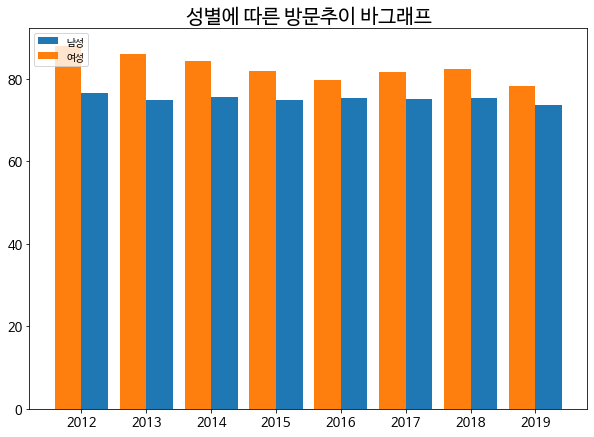

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(men['기간2'], men['서울방문'],label='남성',width=150, align='edge')
plt.bar(female['기간2'], female['서울방문'], label='여성',width=-150, align='edge')
plt.legend(loc=2)
plt.title('성별에 따른 방문추이 바그래프', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()

In [ ]:
# 히트맵으로 성별에 따른 각 지역별 상관계수 확인을 위해 숫자자료 전처리
# 결측치 확인 및 처리
sel_gen.isna().sum()

In [ ]:
sel_gen.info()

In [ ]:
#숫자형으로 바꾸기 위해 '-' (문자역) 제거
sel_gen.롯데월드.unique() # 각 컬럼별 이상치 확인을 위해 유일값 확인

array(['25.8', '30.2', '26.2', '33.0', '21.6', '25', '21', '25.2', '21.9',
       '-', '22.9', '22.6', '23.8'], dtype=object)

In [ ]:
#롯데월드와 이태원에서 '-' 이상값 발견
sel_gen2=sel_gen.replace('-','0.0')
sel_gen = pd.DataFrame(sel_gen2)
#print(type(sel_gen))
sel_gen.롯데월드.unique() 

array(['25.8', '30.2', '26.2', '33.0', '21.6', '25', '21', '25.2', '21.9',
       '0.0', '22.9', '22.6', '23.8'], dtype=object)

In [ ]:
sel_gen2 = sel_gen.astype({'남대문시장': np.float,'롯데월드': np.float,'이태원': np.float,'홍대': np.float,'강남역': np.float})
sel_gen2.info() # 자료형 변경 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 146
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기간      16 non-null     int64         
 1   구분      16 non-null     object        
 2   구분2     16 non-null     object        
 3   서울방문    16 non-null     float64       
 4   명동      16 non-null     float64       
 5   동대문시장   16 non-null     float64       
 6   남대문시장   12 non-null     float64       
 7   고궁      12 non-null     float64       
 8   남산      12 non-null     float64       
 9   인사동     16 non-null     float64       
 10  롯데월드    16 non-null     float64       
 11  이태원     16 non-null     float64       
 12  홍대      16 non-null     float64       
 13  강남역     12 non-null     float64       
 14  기간2     16 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 2.6+ KB


In [ ]:
# 결측치를 max()값으로 채우기 위해 fillna(0). (상위 인기 지역임을 감안. 0값이 있어서 min(), mean(),median()값이 적절치 않았음)
sel_gen2 = sel_gen2.fillna(0)
sel_gen2.head()

기간  구분 구분2  서울방문    명동  동대문시장  ...   인사동  롯데월드   이태원    홍대   강남역        기간2
1   2012  성별  남성  76.6  63.2   52.0  ...  29.4  25.8  23.9  15.2   0.0 2012-01-01
2   2012  성별  여성  87.9  83.6   65.3  ...  33.5  30.2  19.4  23.9   0.0 2012-01-01
22  2013  성별  남성  75.0  60.1   47.7  ...  26.8  26.2  23.7  18.0   0.0 2013-01-01
23  2013  성별  여성  86.1  82.6   63.5  ...  31.4  33.0  20.0  28.9   0.0 2013-01-01
43  2014  성별  남성  75.6  65.8   55.3  ...  26.8  21.6   0.0  24.5  25.1 2014-01-01

[5 rows x 15 columns]

In [ ]:
for i in sel_gen2.index:
    print(i, end="/")
    if sel_gen2.loc[i,'남대문시장'] == 0.0 :
        sel_gen2.loc[i,'남대문시장'] = round(sel_gen2['남대문시장'].max(),1)
for i in sel_gen2.index:        
    if sel_gen2.loc[i,'고궁'] == 0.0 :
        sel_gen2.loc[i,'고궁'] = round(sel_gen2['고궁'].max(),1)
for i in sel_gen2.index:        
    if sel_gen2.loc[i,'남산'] == 0.0 :
        sel_gen2.loc[i,'남산'] = round(sel_gen2['남산'].max(),1)
for i in sel_gen2.index:
    if sel_gen2.loc[i,'강남역'] == 0.0 :
        sel_gen2.loc[i,'강남역']= round(sel_gen2['강남역'].max(),1)
# for i in sel_gen2.index:
#     if sel_gen2.loc[i,'박물관'] == 0.0 :
#         sel_gen2.loc[i,'박물관'] = round(sel_gen2['박물관'].max(),1)
# for i in sel_gen2.index:
#     if sel_gen2.loc[i,'코엑스'] == 0.0 :
#         sel_gen2.loc[i,'코엑스'] = round(sel_gen2['코엑스'].max(),1)
# for i in sel_gen2.index:
#     if sel_gen2.loc[i,'광화문'] == 0.0 :
#         sel_gen2.loc[i,'광화문']= round(sel_gen2['광화문'].max(),1)
# for i in sel_gen2.index:
#     if sel_gen2.loc[i,'유람선'] == 0.0 :
#         sel_gen2.loc[i,'유람선']= round(sel_gen2['유람선'].max(),1)
# for i in sel_gen2.index:
#     if sel_gen2.loc[i,'가로수길'] == 0.0 :
#         sel_gen2.loc[i,'가로수길'] = round(sel_gen2['가로수길'].max(),1)

1/2/22/23/43/44/64/65/85/86/106/107/127/128/145/146/

In [ ]:
sel_gen2.tail() # 결측치 처리여부 확인

기간  구분 구분2  서울방문    명동  동대문시장  ...   인사동  롯데월드   이태원    홍대   강남역        기간2
107  2017  성별  여성  81.8  85.1   60.5  ...  26.2   0.0  22.5  37.3  27.9 2017-01-01
127  2018  성별  남성  75.3  81.9   53.4  ...  37.8  21.6  23.6  28.8  28.7 2018-01-01
128  2018  성별  여성  82.5  92.5   66.2  ...  37.4  22.9  24.0  40.3  27.1 2018-01-01
145  2019  성별  남성  73.8  82.1   50.4  ...  40.3  22.6  22.2  30.1  29.1 2019-01-01
146  2019  성별  여성  78.2  92.2   63.7  ...  39.2  23.8  21.9  45.0  27.6 2019-01-01

[5 rows x 15 columns]

In [ ]:
# 성별에 따른 히트맵 데이터 준비
hmap_gen = sel_gen2.corr()
hmap_gen

기간      서울방문        명동  ...       이태원        홍대       강남역
기간     1.000000 -0.356405  0.486317  ...  0.200112  0.618500  0.091388
서울방문  -0.356405  1.000000  0.599127  ... -0.001226  0.370781 -0.140612
명동     0.486317  0.599127  1.000000  ...  0.074083  0.902743 -0.112749
동대문시장 -0.011692  0.831271  0.790950  ... -0.292611  0.707178 -0.393181
남대문시장  0.315466  0.149077  0.426293  ...  0.775711  0.201830  0.582213
고궁     0.516777 -0.495751  0.026644  ...  0.028877  0.118468 -0.265987
남산     0.690892 -0.014578  0.688968  ... -0.255187  0.722785 -0.360198
인사동    0.424467  0.209426  0.665711  ...  0.421305  0.512876  0.223958
롯데월드  -0.436474  0.299293  0.093831  ... -0.177090 -0.065454 -0.077482
이태원    0.200112 -0.001226  0.074083  ...  1.000000 -0.040428  0.792096
홍대     0.618500  0.370781  0.902743  ... -0.040428  1.000000 -0.220852
강남역    0.091388 -0.140612 -0.112749  ...  0.792096 -0.220852  1.000000

[12 rows x 12 columns]

In [ ]:
colormap = plt.cm.Blues
plt.figure(figsize=(14,12))
plt.title('성별에 따른 관광지 히트맵', fontsize=20)
sns.heatmap(hmap_gen, linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')
plt.tick_params(labelsize=13, rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


#### 1-1-2. 연령별 데이터 전처리 및 시각화 

In [ ]:
sel_age= sel_data1.loc[sel_data1['구분'] == '연령별']
sel_age.shape

(48, 20)

In [ ]:
sel_age1= sel_age.fillna(0)
sel_age1.head()

기간   구분     구분2  서울방문    명동  동대문시장  ... 강남역  코엑스  광화문  유람선  가로수길        기간2
3  2012  연령별  15~20세  94.7  88.9   78.0  ...   0  0.0    0  0.0     0 2012-01-01
4  2012  연령별  21~30세  91.4  82.1   69.1  ...   0  0.0    0  0.0     0 2012-01-01
5  2012  연령별  31~40세  80.0  73.2   59.1  ...   0  0.0    0  0.0     0 2012-01-01
6  2012  연령별  41~50세  78.2  66.2   49.8  ...   0  0.0    0  0.0     0 2012-01-01
7  2012  연령별  51~60세  77.1  66.0   43.5  ...   0  0.0    0  0.0     0 2012-01-01

[5 rows x 20 columns]

In [ ]:
sel_age2= sel_age1.drop(['구분','박물관', '코엑스','광화문','유람선','가로수길'], axis=1)
sel_age2.tail()

기간     구분2  서울방문    명동  동대문시장  ...  롯데월드   이태원    홍대   강남역        기간2
148  2019  21~30세  78.2  92.1   62.1  ...  26.7  27.4  54.6  32.6 2019-01-01
149  2019  31~40세  76.7  87.6   61.2  ...  24.7  21.0  33.0  27.2 2019-01-01
150  2019  41~50세  74.2  84.5   54.0  ...  21.0  20.5  28.2  26.6 2019-01-01
151  2019  51~60세  70.6  83.5   54.6  ...  17.9  17.3  26.0  24.7 2019-01-01
152  2019   61세이상  80.9  87.3   48.2  ...  13.2   9.0  17.3  16.1 2019-01-01

[5 rows x 14 columns]

In [ ]:
sel_age2.dtypes

기간                int64
구분2              object
서울방문            float64
명동              float64
동대문시장           float64
남대문시장            object
고궁              float64
남산              float64
인사동             float64
롯데월드             object
이태원              object
홍대               object
강남역              object
기간2      datetime64[ns]
dtype: object

In [ ]:
sel_age2.롯데월드.unique() #sel_age2.이태원.unique() 

array(['52.5', '36.1', '25.0', '22.0', '15.7', '12.4', '46.3', '37.9',
       '26.6', '24.5', '15.9', '17.2', '37.5', '28.3', '20.6', '17.3',
       '15.2', '10.6', '29.9', '27.4', '21.3', '19.1', '17.4', '13.8',
       '34.6', '25.5', '24.4', '17.5', '13.4', '-', '29.3', '24.2',
       '19.3', '18.7', '13.9', '31.3', '26.7', '24.7', '21.0', '17.9',
       '13.2'], dtype=object)

In [ ]:
sel_age3=sel_age2.replace('-','0.0')
sel_age2=pd.DataFrame(sel_age3)

In [ ]:
sel_age3 = sel_age2.astype({'기간':'str','남대문시장': np.float,'롯데월드': np.float,'이태원':np.float,'홍대':np.float,'강남역':np.float})
sel_age3.dtypes 

기간               object
구분2              object
서울방문            float64
명동              float64
동대문시장           float64
남대문시장           float64
고궁              float64
남산              float64
인사동             float64
롯데월드            float64
이태원             float64
홍대              float64
강남역             float64
기간2      datetime64[ns]
dtype: object

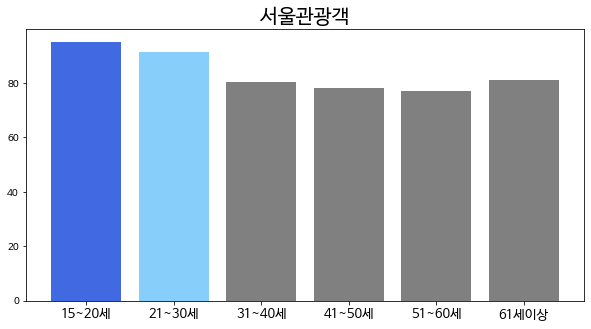

In [ ]:
#명동 방한객 연령별 추이
color_style = ['royalblue', 'lightskyblue','grey','grey','grey','grey']
plt.figure(figsize=(10,5))
plt.bar(sel_age3['구분2'], sel_age3['서울방문'], color=color_style) # width=0.5
plt.title('서울관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

In [ ]:
#명동 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['lightskyblue','grey','grey','grey','grey','royalblue']
plt.bar(sel_age3['구분2'], sel_age3['명동'],color=colors) 
plt.title('명동관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

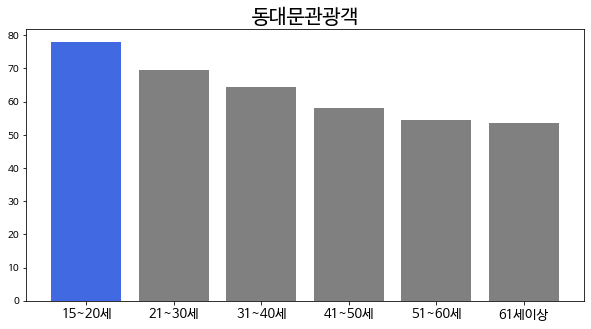

In [ ]:
#동대문 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['royalblue','grey','grey','grey','grey','grey']
plt.bar(sel_age3['구분2'], sel_age3['동대문시장'], color=colors) 
plt.title('동대문관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

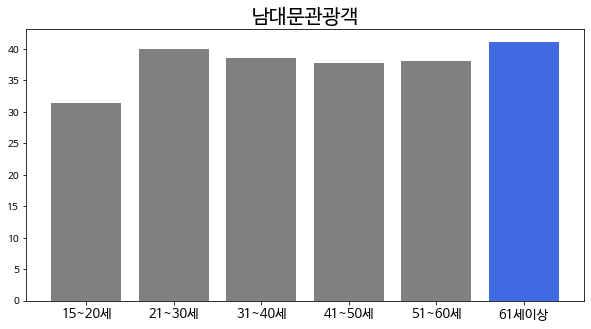

In [ ]:
#남대문 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['grey','grey','grey','grey','grey','royalblue']
plt.bar(sel_age3['구분2'], sel_age3['남대문시장'], color=colors) 
plt.title('남대문관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

In [ ]:
#고궁 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['grey','lightskyblue','grey','grey','grey','royalblue']
plt.bar(sel_age3['구분2'], sel_age3['고궁'], color=colors) 
plt.title('고궁관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

In [ ]:
#남산 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['royalblue','lightskyblue','grey','grey','grey','grey',]
plt.bar(sel_age3['구분2'], sel_age3['남산'],color=colors) 
plt.title('남산관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

In [ ]:
#인사동 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['grey','grey','grey','grey','lightskyblue','royalblue']
plt.bar(sel_age3['구분2'], sel_age3['인사동'],color=colors) 
plt.title('인사동관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

In [ ]:
#롯데월드 방한객 연령별 추이\
plt.figure(figsize=(10,5))
colors = ['royalblue','grey','grey','grey','grey','grey']
plt.bar(sel_age3['구분2'], sel_age3['롯데월드'],color=colors) 
plt.title('롯데월드관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

In [ ]:
#이태원 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['royalblue','lightskyblue','grey','grey','grey','grey',]
plt.bar(sel_age3['구분2'], sel_age3['이태원'], color=colors) 
plt.title('이태원관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

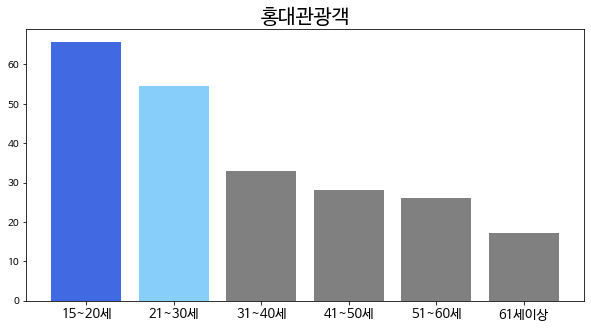

In [ ]:
#홍대 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['royalblue','lightskyblue','grey','grey','grey','grey']
plt.bar(sel_age3['구분2'], sel_age3['홍대'], color=colors) 
plt.title('홍대관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

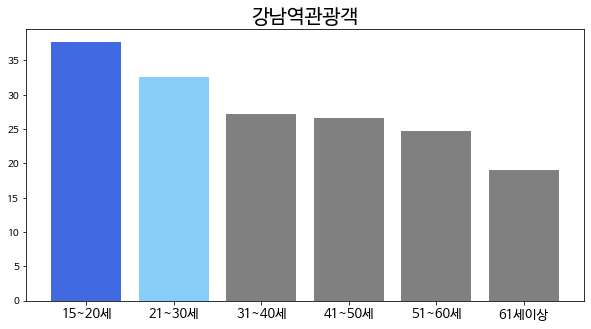

In [ ]:
#강남역 방한객 연령별 추이
plt.figure(figsize=(10,5))
colors = ['royalblue','lightskyblue','grey','grey','grey','grey']
plt.bar(sel_age3['구분2'], sel_age3['강남역'],color=colors) 
plt.title('강남역관광객', fontsize=20)
plt.xticks(['15~20세', '21~30세','31~40세', '41~50세', '51~60세','61세이상'],fontsize=13)
plt.show()

In [ ]:
# 바그래프 통합
plt.figure(figsize=(30,10))
n=1
for place in sel_age3.columns[2:]: 
    ax = plt.subplot(3,5,n)
    plt.bar(sel_age3['구분2'], sel_age3[place])
    plt.title(f'{place} 관광객')
    n+=1
#plt.show()

In [ ]:
#히트맵
hmap_ages = sel_age3.corr()
hmap_ages

서울방문        명동     동대문시장  ...       이태원        홍대       강남역
서울방문   1.000000  0.697041  0.767279  ...  0.264680  0.737860  0.127950
명동     0.697041  1.000000  0.816468  ...  0.372132  0.876370  0.510831
동대문시장  0.767279  0.816468  1.000000  ...  0.225606  0.767031  0.267022
남대문시장 -0.088361 -0.642508 -0.218048  ... -0.328769 -0.438505 -0.529683
고궁    -0.081515 -0.592747 -0.149119  ... -0.508159 -0.372262 -0.380713
남산     0.284722 -0.155704  0.269159  ... -0.460074  0.025093 -0.145607
인사동    0.171720  0.560410  0.194508  ...  0.395488  0.375388  0.119453
롯데월드   0.623453  0.480755  0.645672  ...  0.088446  0.483145 -0.213724
이태원    0.264680  0.372132  0.225606  ...  1.000000  0.349437 -0.134813
홍대     0.737860  0.876370  0.767031  ...  0.349437  1.000000  0.561644
강남역    0.127950  0.510831  0.267022  ... -0.134813  0.561644  1.000000

[11 rows x 11 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


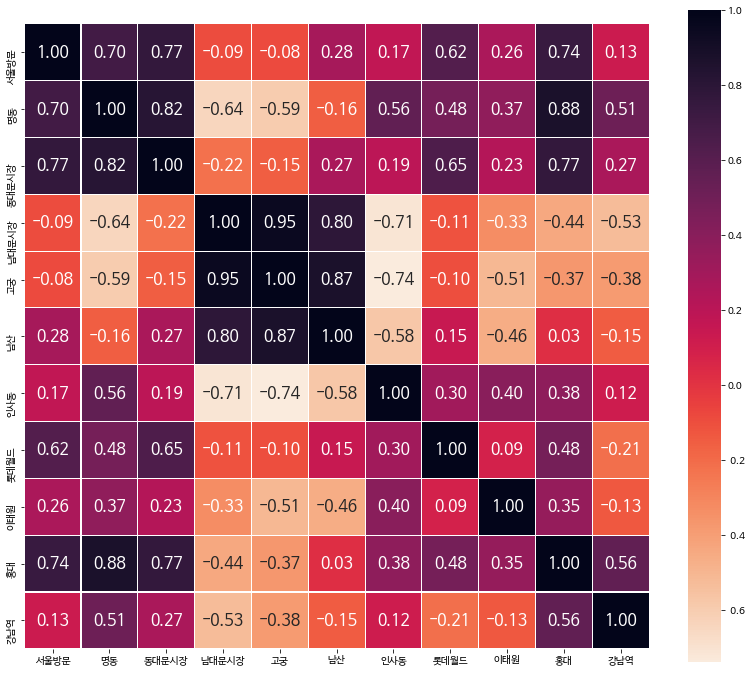

In [ ]:
plt.figure(figsize=(14,12))
#plt.title('')
sns.heatmap(hmap_ages, linewidths=0.1, vmax=1.0,
           square=True, cmap='rocket_r', linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

#### 1-1-3.방한횟수별 데이터 전처리 및 시각화

In [14]:
tour_times = sel_data1[sel_data1['구분'] == '방한횟수']

In [ ]:
tour_times = tour_times.drop(['박물관', '코엑스', '광화문',	'유람선', '가로수길','기간2'], axis=1)                          

In [ ]:
tour_times.head()

기간    구분    구분2  서울방문    명동  동대문시장  ...    남산   인사동  롯데월드   이태원    홍대  강남역
17  2012  방한횟수     1회  87.9  75.9   64.1  ...  42.2  33.2  33.2  22.6  20.9  NaN
18  2012  방한횟수     2회  73.1  75.3   58.1  ...  31.1  31.5  26.3  19.3  18.9  NaN
19  2012  방한횟수     3회  75.9  71.2   50.3  ...  25.8  31.8  20.8  20.9  20.9  NaN
20  2012  방한횟수  4회 이상  76.3  70.3   46.9  ...  15.4  25.8  14.6  18.8  17.3  NaN
38  2013  방한횟수     1회  82.5  74.7   60.8  ...  38.8  30.7  36.3  23.6  25.4  NaN

[5 rows x 14 columns]

In [ ]:
by_times = dict()
times_label = ['1회', '2회', '3회', '4회 이상']
for x in times_label:
    by_times[x] = tour_times[tour_times['구분2'] == x]
#print(by_times)

In [ ]:
for x in times_label:
    by_times[x] = by_times[x].replace('-', None)

In [ ]:
for t in times_label:
    by_times[t][by_times[t].columns[4:]] = by_times[t][by_times[t].columns[4:]].astype(float)

In [ ]:
for x in times_label:
    for i, r in by_times[x].iterrows():
        v = min(filter(lambda x: x is not None, r.values[4:]))
        by_times[x].loc[i, :] = by_times[x].loc[i, :].fillna(v)

In [ ]:
years = list(set(tour_times['기간']))
years.sort()
print(years)

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [ ]:
place_label = ['명동', '동대문시장', '남대문시장', '고궁', '남산', '인사동', '롯데월드', '이태원', '홍대', '강남역']

In [ ]:
by_place = dict()
for x in place_label:
    dt = dict()
    for y in times_label:
        #print(y)
        dt[y] = list(by_times[y][x])
    by_place[x] = dt

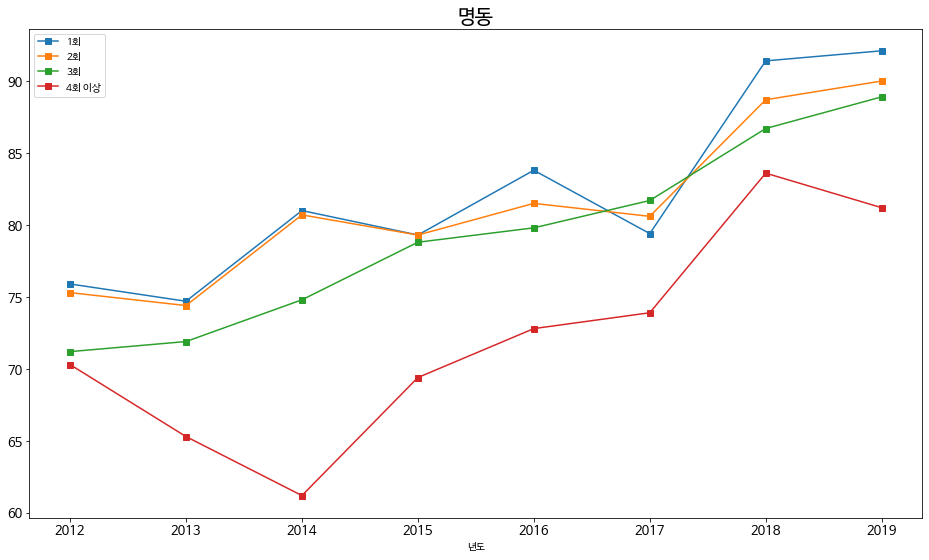

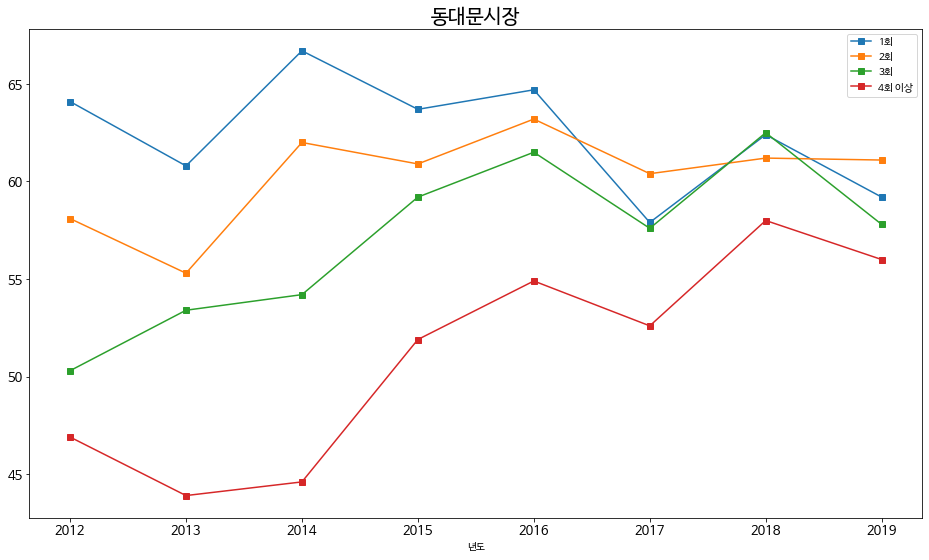

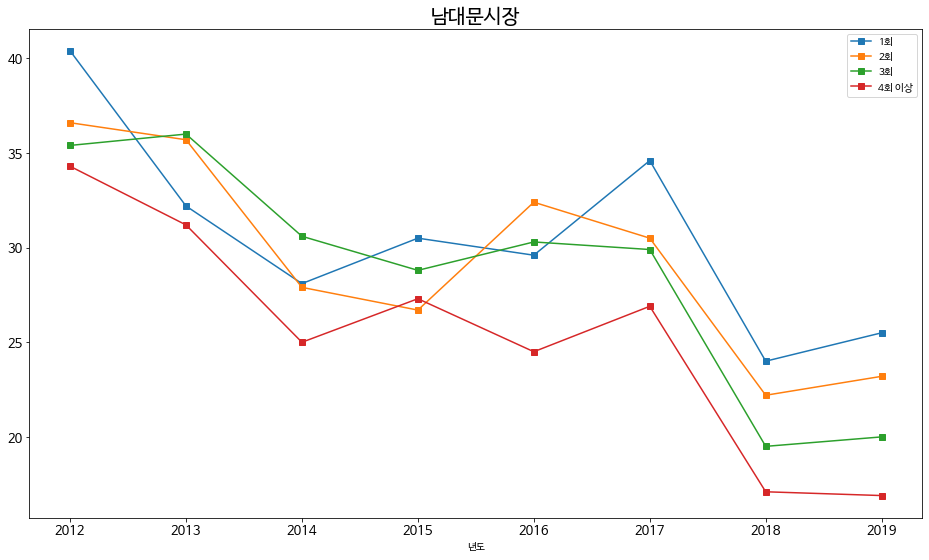

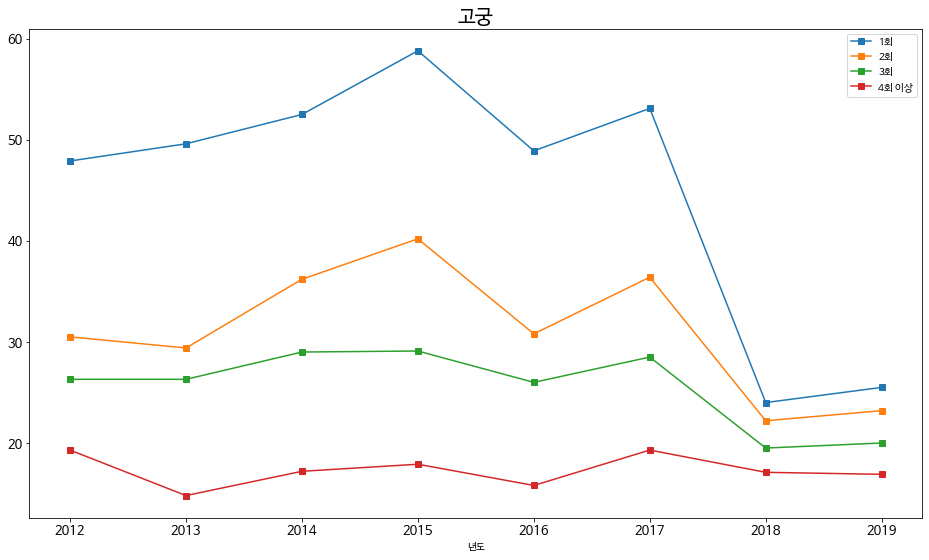

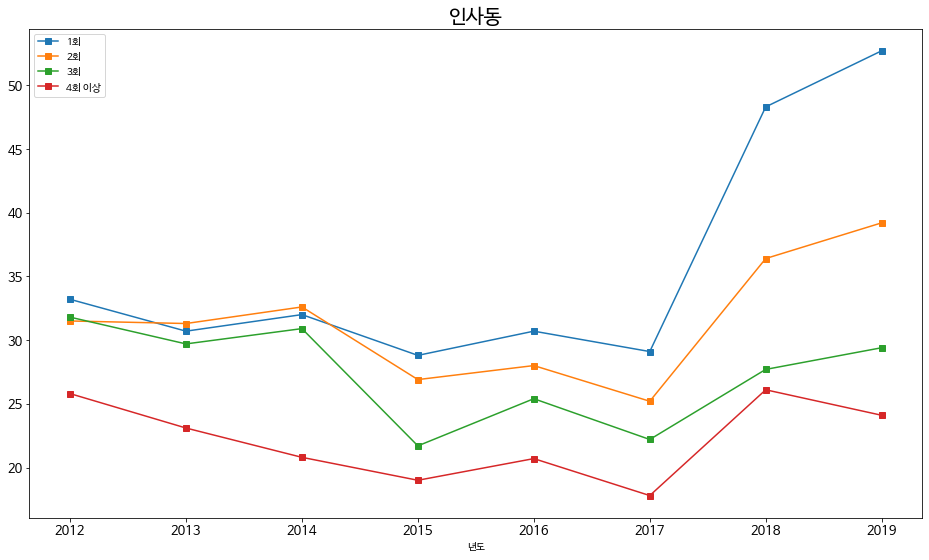

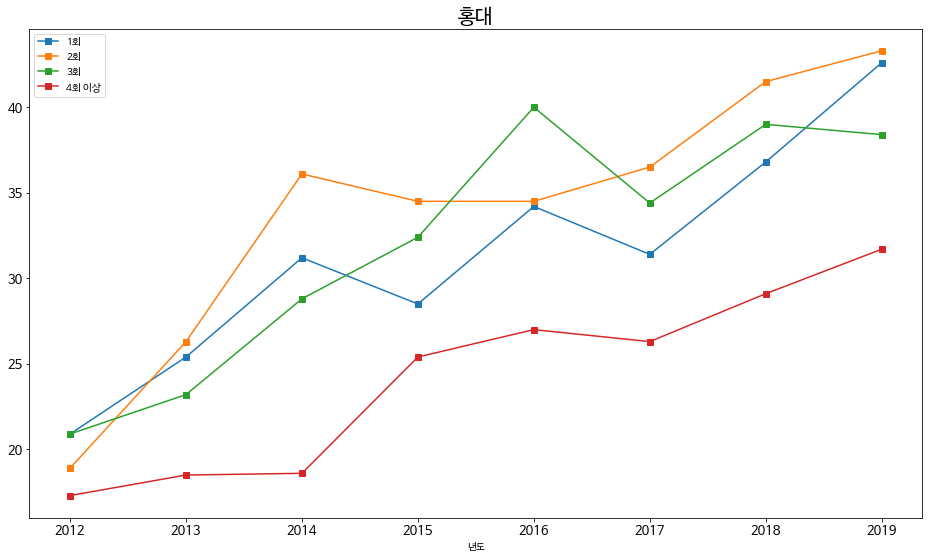

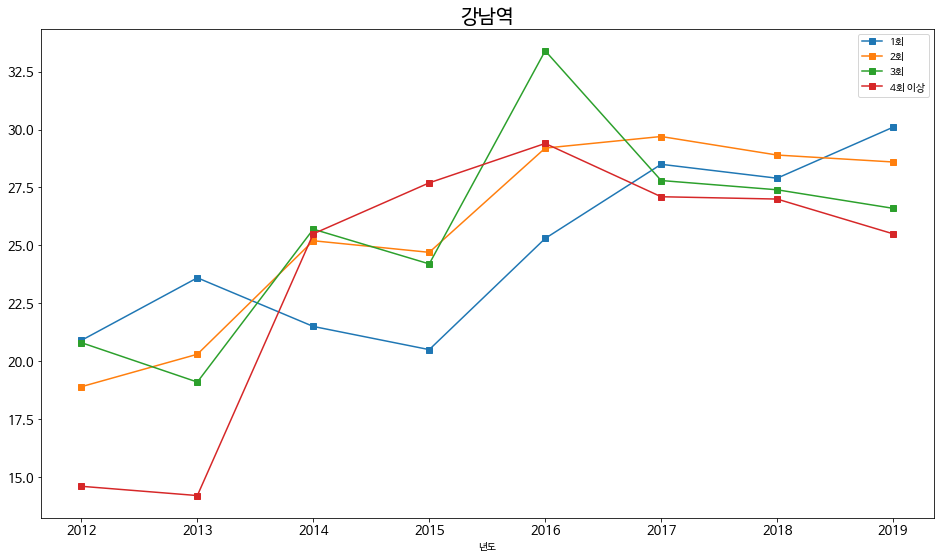

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(30, 12))
n = 0
for place in place_label:
    n += 1
    ax = plt.subplot(2, 5, n)
    for k, v in by_place[place].items():
        plt.plot(years, v, marker='s', label=k)
    plt.xlabel('년도')
    plt.title(place)
    plt.legend()
plt.show()

#### 1-4. 방한 목적별 데이터 전처리 및 시각화

In [27]:
tour_pur = sel_data1[sel_data1['구분'] == '방한목적']
tour_pur = tour_pur.drop(['박물관', '코엑스', '광화문',	'유람선', '가로수길','기간2'], axis=1)
tour_pur.head(20)

기간    구분         구분2  서울방문    명동  ...   인사동  롯데월드   이태원    홍대   강남역
9   2012  방한목적    여가/위락/휴가  86.7  83.4  ...  33.0  32.8  18.0  19.2   NaN
10  2012  방한목적  뷰티 건강 및 치료  82.2  79.9  ...  23.0  27.2  11.2  13.1   NaN
11  2012  방한목적     종교 및 순례  60.8  47.7  ...  27.5  12.9  13.6  12.7   NaN
12  2012  방한목적          쇼핑  94.2  95.1  ...  30.3  21.7  15.0  18.5   NaN
13  2012  방한목적    친구/친지 방문  78.9  65.4  ...  38.2  22.0  28.9  28.2   NaN
14  2012  방한목적    사업/전문 활동  69.7  43.0  ...  23.9  16.4  25.0   9.0   NaN
15  2012  방한목적          교육  90.8  85.8  ...  40.2  56.8  36.2  50.2   NaN
16  2012  방한목적          기타  88.1  60.8  ...  34.3  15.7  20.9   5.1   NaN
30  2013  방한목적    여가/위락/휴가  81.6  81.4  ...  30.0  36.4  18.8  26.3   NaN
31  2013  방한목적  뷰티 건강 및 치료  93.1  83.4  ...  20.0  31.2   9.0  15.1   NaN
32  2013  방한목적     종교 및 순례  69.6  69.1  ...  28.3  37.9  11.7  22.1   NaN
33  2013  방한목적          쇼핑  92.6  92.3  ...  27.1  24.9  13.8  23.5   NaN
34  2013  방한목적    친구/친지 방문  85.1  67.9  ...  36.0  22.3  29.5  27.2   NaN
35  2013  방한목적    사업/전문 활동  69.7  38.0  ...  20.1  16.1  21.1   8.4   NaN
36  2013  방한목적          교육  91.4  86.0  ...  48.9  45.6  49.3  54.4   NaN
37  2013  방한목적          기타  36.4  66.9  ...  31.7  31.7  40.2  47.4   NaN
51  2014  방한목적    여가/위락/휴가  79.2  87.8  ...  32.5  29.8     -  34.1  18.5
52  2014  방한목적  뷰티 건강 및 치료  87.1  72.6  ...  25.3  19.9     -  14.5  34.6
53  2014  방한목적     종교 및 순례  73.0  73.1  ...  25.7  15.8     -  18.9  16.9
54  2014  방한목적          쇼핑  94.0  95.8  ...  27.5  19.9     -  31.4  15.2

[20 rows x 14 columns]

In [28]:
by_purpose = dict()
purpose_label = ['여가/위락/휴가', '뷰티 건강 및 치료', '종교 및 순례', '쇼핑', '친구/친지 방문', '사업/전문 활동', '교육', '기타']
for x in purpose_label:
    by_purpose[x] = tour_pur[tour_pur['구분2'] == x]

In [29]:
for x in purpose_label:
    by_purpose[x] = by_purpose[x].replace('-', None)
#print(by_purpose)

In [30]:
for t in purpose_label:
    by_purpose[t][by_purpose[t].columns[4:]] = by_purpose[t][by_purpose[t].columns[4:]].astype(float)

In [31]:
for x in purpose_label:
    for i, r in by_purpose[x].iterrows():
        v = min(filter(lambda x: x is not None, r.values[4:]))
        by_purpose[x].loc[i, :] = by_purpose[x].loc[i, :].fillna(v)

In [32]:
years = list(set(tour_pur['기간']))
years.sort()
print(years)
print(by_purpose)

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
{'여가/위락/휴가':        기간    구분       구분2  서울방문    명동  ...   인사동  롯데월드   이태원    홍대   강남역
9    2012  방한목적  여가/위락/휴가  86.7  83.4  ...  33.0  32.8  18.0  19.2  18.0
30   2013  방한목적  여가/위락/휴가  81.6  81.4  ...  30.0  36.4  18.8  26.3  18.8
51   2014  방한목적  여가/위락/휴가  79.2  87.8  ...  32.5  29.8  18.8  34.1  18.5
72   2015  방한목적  여가/위락/휴가  75.8  87.2  ...  27.6  28.4  18.8  32.3  18.4
93   2016  방한목적  여가/위락/휴가  73.8  89.1  ...  31.1  26.0  18.8  35.6  23.5
114  2017  방한목적  여가/위락/휴가  80.0  87.7  ...  27.8  26.0  22.8  34.8  25.2
135  2018  방한목적  여가/위락/휴가  81.5  93.8  ...  39.6  24.1  25.0  39.3  27.0
153  2019  방한목적  여가/위락/휴가  79.9  94.6  ...  41.9  24.9  22.9  45.3  26.7

[8 rows x 14 columns], '뷰티 건강 및 치료':        기간    구분         구분2  서울방문    명동  ...   인사동  롯데월드   이태원    홍대   강남역
10   2012  방한목적  뷰티 건강 및 치료  82.2  79.9  ...  23.0  27.2  11.2  13.1  11.2
31   2013  방한목적  뷰티 건강 및 치료  93.1  83.4  ...  20.0  31.2   9.0  15.1   9.0
52   2014  방한목적  뷰

In [33]:
place_label = ['명동', '동대문시장', '남대문시장', '고궁', '남산', '인사동', '롯데월드', '이태원', '홍대', '강남역']

In [35]:
by_place2 = dict()
for x in place_label:
    dt = dict()
    for y in purpose_label:
        dt[y] = by_purpose[y][['기간', x]]
    by_place2[x] = dt

In [36]:
type(by_place2)

dict

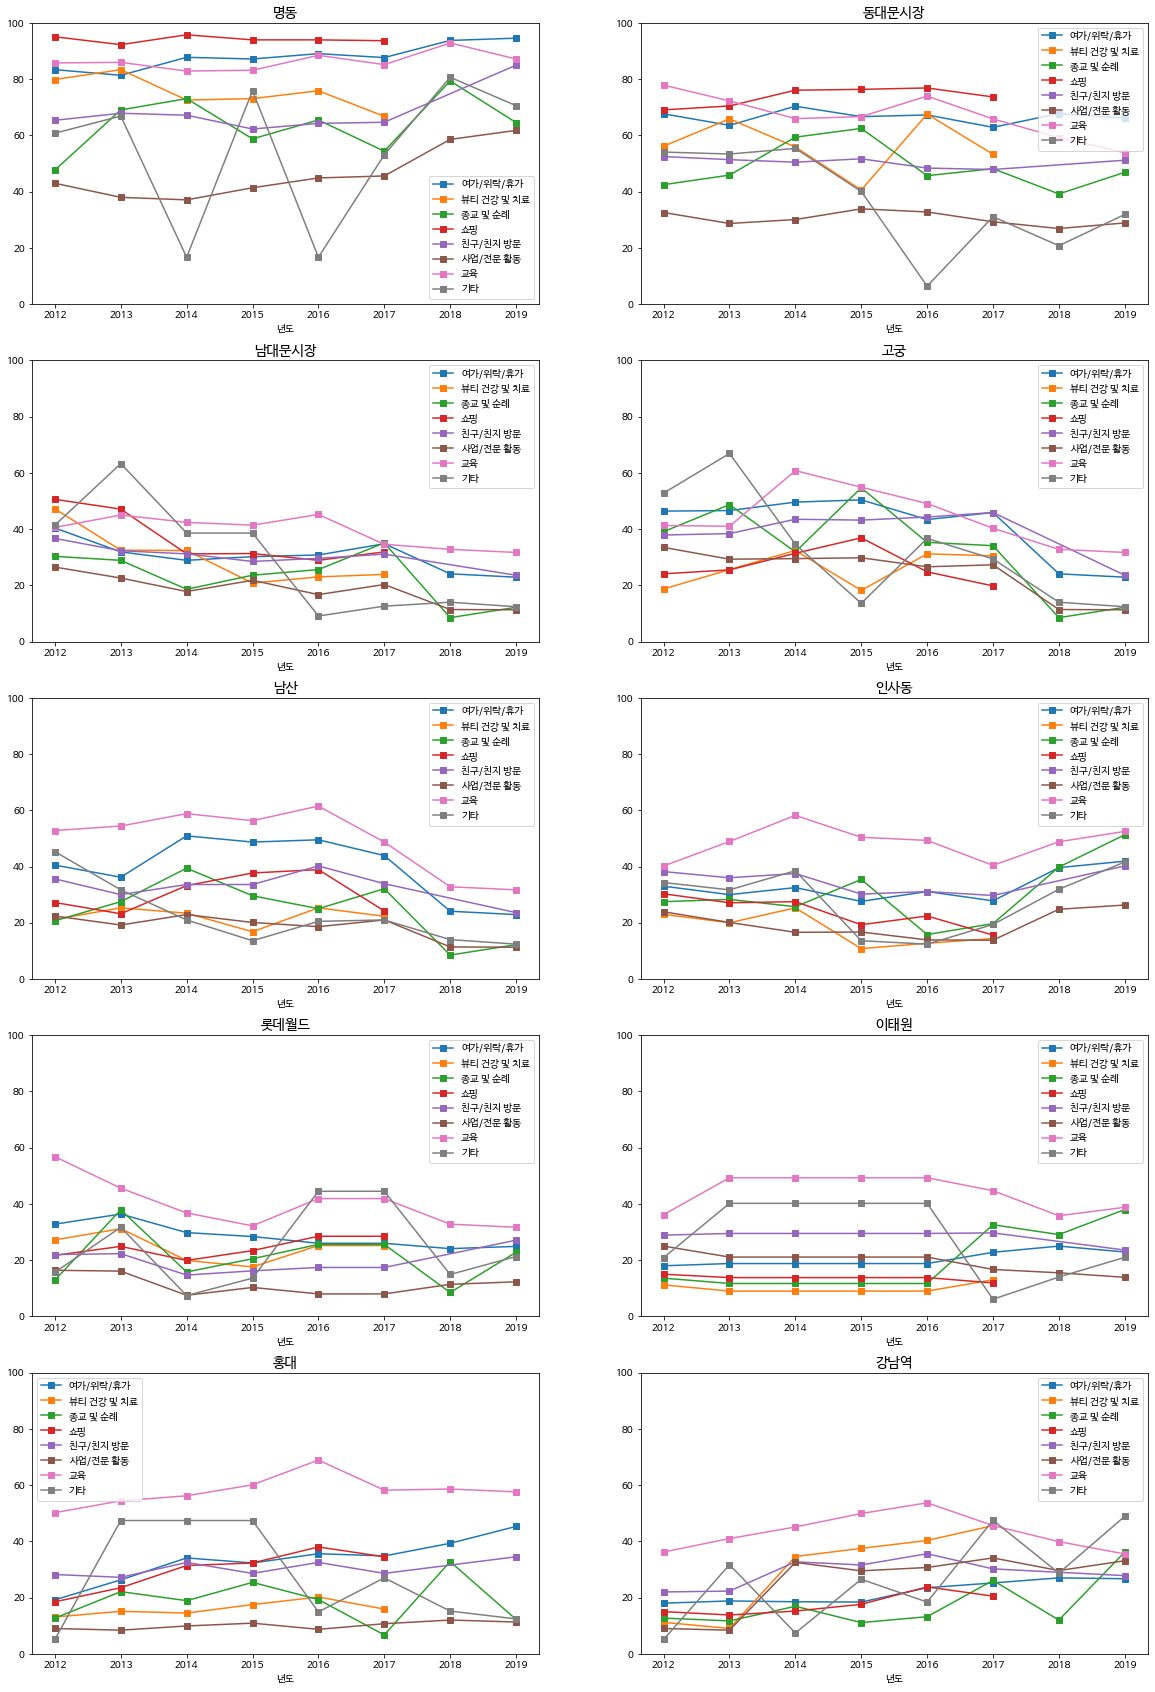

In [37]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 30))
n = 0
for place in place_label:
    n += 1
    ax = plt.subplot(5, 2, n)
    for k, v in by_place2[place].items():
        x = v['기간']
        y = v[place]
        plt.ylim([0, 100])
        plt.plot(x, y, marker='s', label=k)
    plt.xlabel('년도')
    plt.title(place, fontdict={'size': 14})
    plt.legend()
plt.show()

#### 챠트 모아 출력하기(PPT용)

In [38]:
#연령별

tour_age = sel_data1[sel_data1['구분'] == '연령별']
tour_age = tour_age.drop(['박물관', '코엑스', '광화문',	'유람선', '가로수길','기간2'], axis=1)
tour_age.head(10)

기간   구분     구분2  서울방문    명동  동대문시장  ...    남산   인사동  롯데월드   이태원    홍대  강남역
3   2012  연령별  15~20세  94.7  88.9   78.0  ...  39.4  24.3  52.5  18.7  32.5  NaN
4   2012  연령별  21~30세  91.4  82.1   69.1  ...  42.9  36.0  36.1  26.7  32.1  NaN
5   2012  연령별  31~40세  80.0  73.2   59.1  ...  33.4  28.6  25.0  20.4  14.3  NaN
6   2012  연령별  41~50세  78.2  66.2   49.8  ...  27.0  29.0  22.0  18.1  12.1  NaN
7   2012  연령별  51~60세  77.1  66.0   43.5  ...  27.6  33.0  15.7  15.9   8.7  NaN
8   2012  연령별   61세이상  61.4  59.6   40.8  ...  25.7  33.5  12.4  17.4   5.2  NaN
24  2013  연령별  15~20세  90.3  84.0   71.1  ...  37.0  29.7  46.3  29.7  40.9  NaN
25  2013  연령별  21~30세  86.4  81.7   65.8  ...  39.7  31.8  37.9  26.6  37.1  NaN
26  2013  연령별  31~40세  79.3  70.7   55.6  ...  31.0  28.6  26.6  20.4  19.3  NaN
27  2013  연령별  41~50세  77.2  65.1   47.4  ...  22.8  25.1  24.5  15.3  12.0  NaN

[10 rows x 14 columns]

In [39]:
by_age = dict()
age_label = ['15~20세', '21~30세', '31~40세', '41~50세', '51~60세', '61세이상']
for x in age_label:
    by_age[x] = tour_age[tour_age['구분2'] == x]

In [40]:
for x in age_label:
    by_age[x] = by_age[x].replace('-', None)

In [41]:
for t in age_label:
    by_age[t][by_age[t].columns[4:]] = by_age[t][by_age[t].columns[4:]].astype(float)

In [42]:
for x in age_label:
    for i, r in by_age[x].iterrows():
        v = min(filter(lambda x: x is not None, r.values[4:]))
        by_age[x].loc[i, :] = by_age[x].loc[i, :].fillna(v)

In [43]:
by_place3 = dict()
for x in place_label:
    dt = dict()
    for y in age_label:
        dt[y] = list(by_age[y][x])
    by_place3[x] = dt

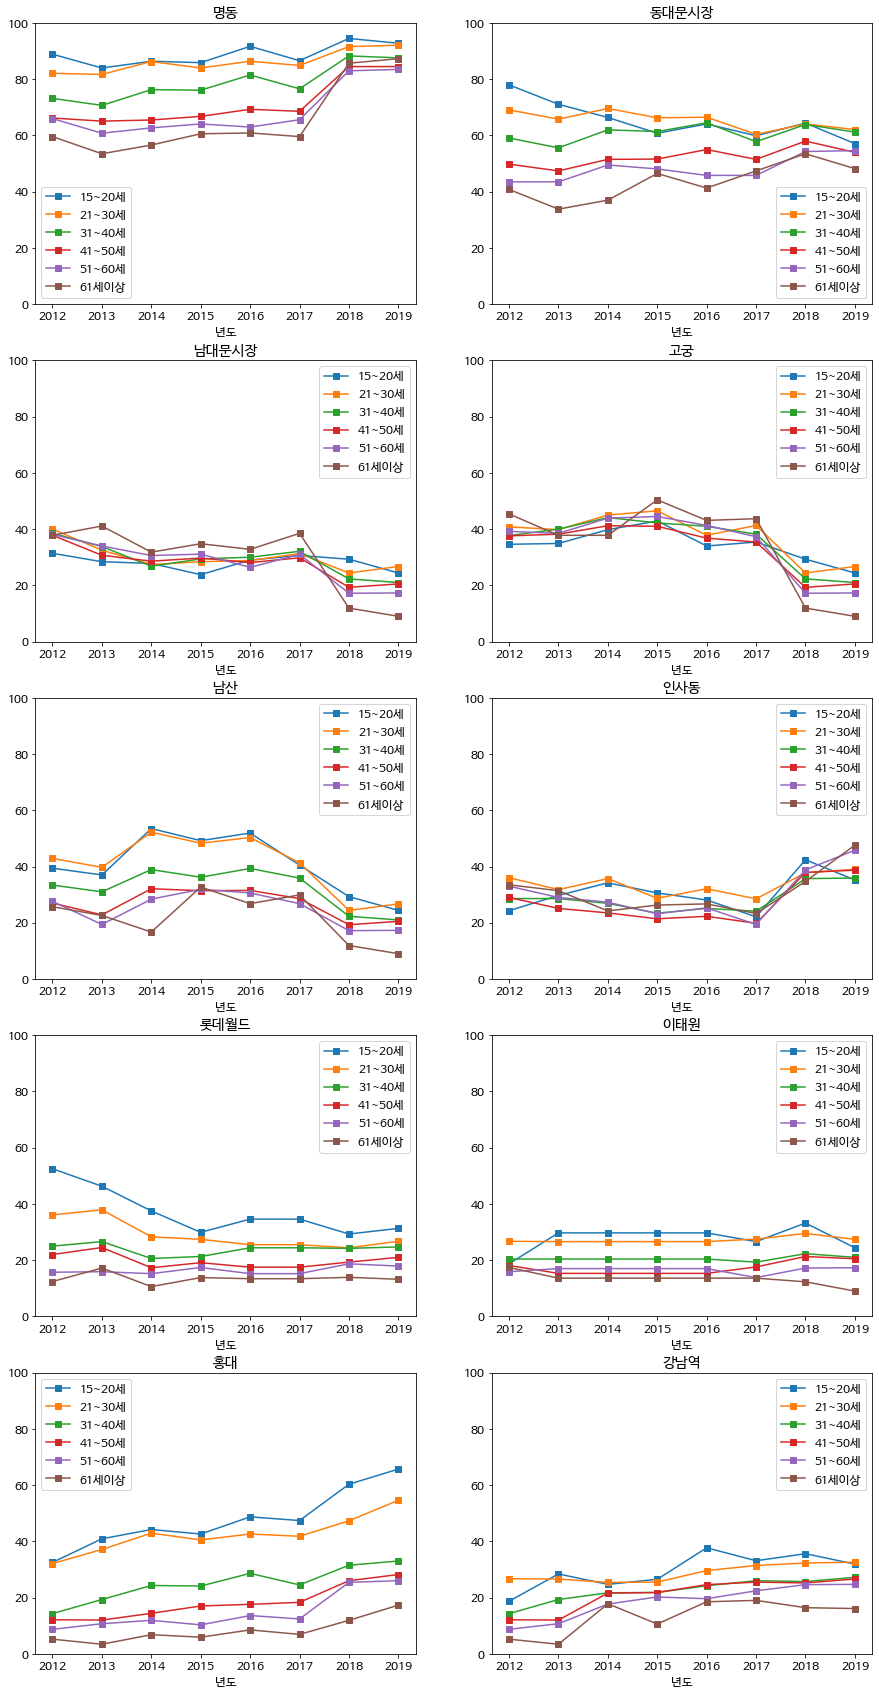

In [44]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15, 30))
n = 0
for place in place_label:
    n += 1
    ax = plt.subplot(5, 2, n)
    for k, v in by_place3[place].items():
        plt.ylim([0, 100])
        plt.plot(years, v, marker='s', label=k)
    plt.xlabel('년도')
    plt.title(place)
    plt.legend()
plt.show()

In [45]:
#성별

tour_gender = sel_data1[sel_data1['구분'] == '성별']
tour_gender = tour_gender.drop(['박물관', '코엑스', '광화문',	'유람선', '가로수길','기간2'], axis=1)
tour_gender = tour_gender.reset_index()

In [46]:
tour_gender = tour_gender.replace('-', None)
tour_gender

index    기간  구분 구분2  서울방문    명동  ...    남산   인사동  롯데월드   이태원    홍대   강남역
0       1  2012  성별  남성  76.6  63.2  ...  34.4  29.4  25.8  23.9  15.2   NaN
1       2  2012  성별  여성  87.9  83.6  ...  35.5  33.5  30.2  19.4  23.9   NaN
2      22  2013  성별  남성  75.0  60.1  ...  28.5  26.8  26.2  23.7  18.0   NaN
3      23  2013  성별  여성  86.1  82.6  ...  33.9  31.4  33.0  20.0  28.9   NaN
4      43  2014  성별  남성  75.6  65.8  ...  39.8  26.8  21.6  20.0  24.5  25.1
5      44  2014  성별  여성  84.3  86.2  ...  44.4  32.9    25  20.0  33.8  21.3
6      64  2015  성별  남성  74.8  66.1  ...  38.4  21.8    21  20.0  21.5  23.6
7      65  2015  성별  여성  81.9  85.2  ...  42.4  28.7  25.2  20.0  34.8  22.8
8      85  2016  성별  남성  75.5  71.9  ...  39.4  25.2  21.9  20.0  23.6  27.2
9      86  2016  성별  여성  79.8  87.2  ...  45.5  29.9  25.2  20.0  39.7  27.1
10    106  2017  성별  남성  75.1  69.4  ...  35.8  22.9  25.2  22.4  23.1  28.8
11    107  2017  성별  여성  81.8  85.1  ...  37.2  26.2  25.2  22.5  37.3  27.9
12    127  2018  성별  남성  75.3  81.9  ...   NaN  37.8  21.6  23.6  28.8  28.7
13    128  2018  성별  여성  82.5  92.5  ...   NaN  37.4  22.9  24.0  40.3  27.1
14    145  2019  성별  남성  73.8  82.1  ...   NaN  40.3  22.6  22.2  30.1  29.1
15    146  2019  성별  여성  78.2  92.2  ...   NaN  39.2  23.8  21.9  45.0  27.6

[16 rows x 15 columns]

In [47]:
by_gender = dict()
gender_label = ['남성', '여성']
for x in gender_label:
    by_gender[x] = tour_gender[tour_gender['구분2'] == x]

In [48]:
for x in gender_label:
    by_gender[x] = by_gender[x].replace('-', None)

In [49]:
for t in gender_label:
    by_gender[t][by_gender[t].columns[4:]] = by_gender[t][by_gender[t].columns[4:]].astype(float)

In [50]:
for x in gender_label:
    for i, r in by_gender[x].iterrows():
        v = min(filter(lambda x: x is not None, r.values[4:]))
        by_gender[x].loc[i, :] = by_gender[x].loc[i, :].fillna(v)

In [51]:
by_place4 = dict()
for x in place_label:
    dt = dict()
    for y in gender_label:
        dt[y] = list(by_gender[y][x])
    by_place4[x] = dt

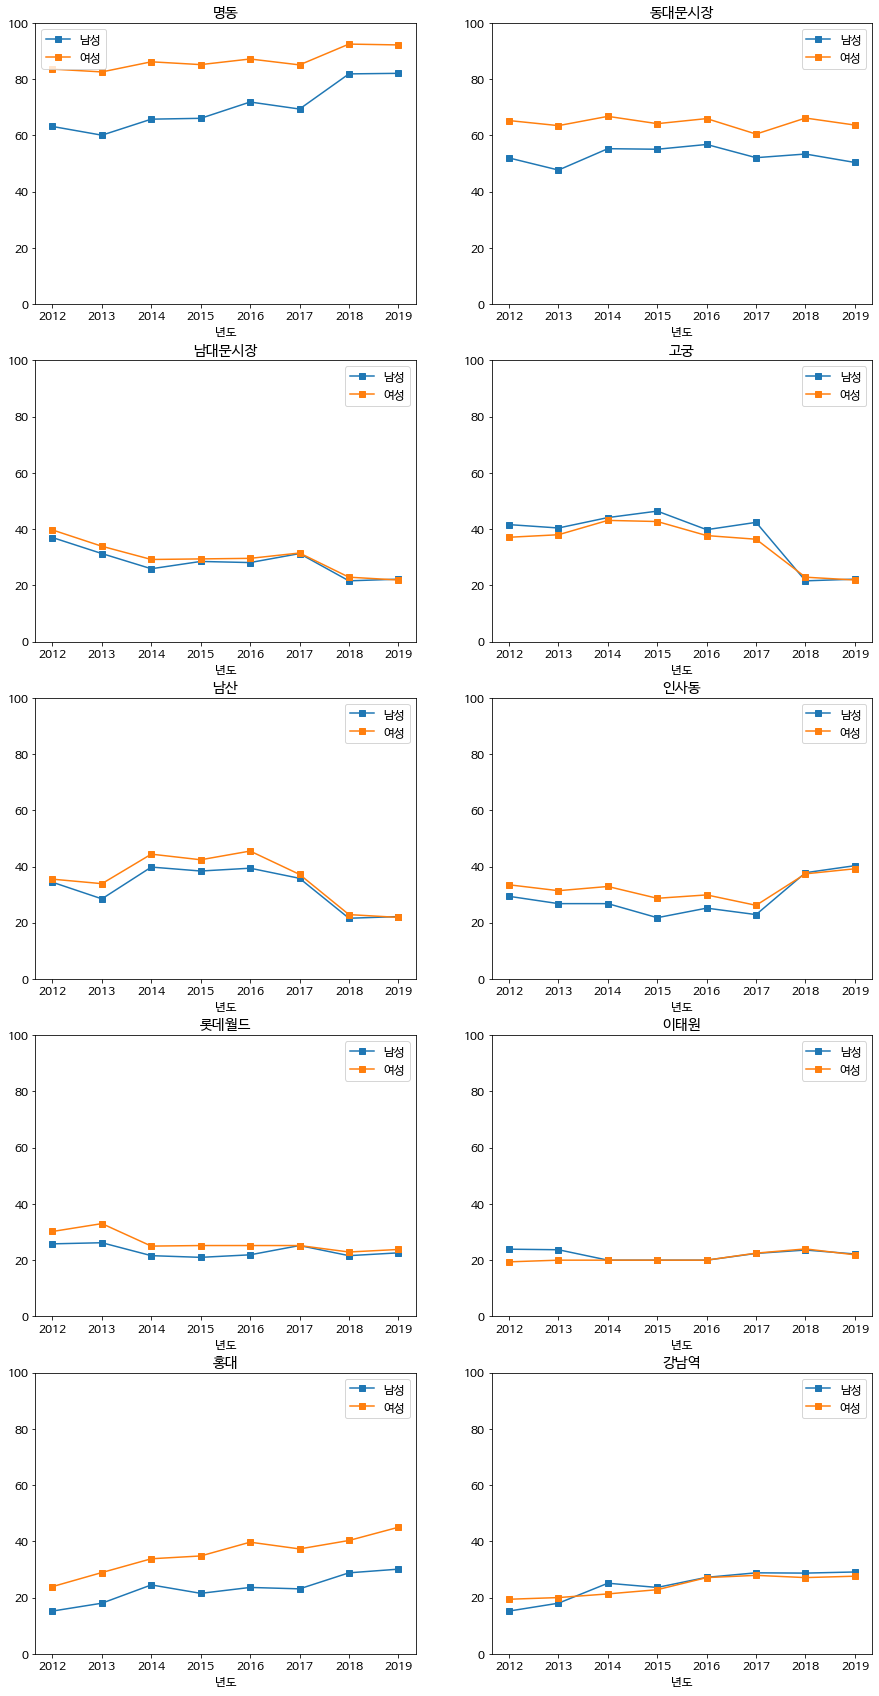

In [52]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15, 30))
n = 0
for place in place_label:
    n += 1
    ax = plt.subplot(5, 2, n)
    for k, v in by_place4[place].items():
        plt.ylim([0, 100])
        plt.plot(years, v, marker='s', label=k)
    plt.xlabel('년도')
    plt.title(place)
    plt.legend()
plt.show()

### 1-2.서울지역 방문지(월별) 데이터 전처리 및 시각화 

In [ ]:
m_sel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/서울방문객월별증감률.csv',
                       encoding = "cp949", 
                       names=['기간','월별','서울방문','명동','동대문시장','남대문시장','고궁','남산','인사동','박물관','롯데월드','홍대','이태원','강남역','코엑스','광화문','유람선','가로수길'],
                       header=0)

In [ ]:
m_sel_df.head()

기간  월별  서울방문    명동  동대문시장  남대문시장  ...   이태원  강남역  코엑스  광화문 유람선  가로수길
0  2012  전체  82.5  74.5   59.4   38.5  ...  21.4  NaN  NaN  NaN NaN   NaN
1  2012  1월  82.1  67.3   59.8   40.4  ...  19.6  NaN  NaN  NaN NaN   NaN
2  2012  2월  84.0  75.9   62.6   44.9  ...    22  NaN  NaN  NaN NaN   NaN
3  2012  3월  82.0  73.1   58.1   39.9  ...  25.8  NaN  NaN  NaN NaN   NaN
4  2012  4월  84.6  69.5   55.1   39.6  ...    21  NaN  NaN  NaN NaN   NaN

[5 rows x 18 columns]

In [ ]:
m_sel_df = m_sel_df.drop(['박물관', '코엑스', '광화문',	'유람선', '가로수길'], axis=1)

In [ ]:
m_sel_df.shape

(104, 13)

In [ ]:
m_sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      104 non-null    int64  
 1   월별      104 non-null    object 
 2   서울방문    104 non-null    float64
 3   명동      104 non-null    float64
 4   동대문시장   104 non-null    float64
 5   남대문시장   78 non-null     float64
 6   고궁      78 non-null     float64
 7   남산      78 non-null     float64
 8   인사동     104 non-null    float64
 9   롯데월드    104 non-null    object 
 10  홍대      104 non-null    float64
 11  이태원     104 non-null    object 
 12  강남역     78 non-null     float64
dtypes: float64(9), int64(1), object(3)
memory usage: 10.7+ KB


In [ ]:
m_sel_df.isnull().sum()

기간        0
월별        0
서울방문      0
명동        0
동대문시장     0
남대문시장    26
고궁       26
남산       26
인사동       0
롯데월드      0
홍대        0
이태원       0
강남역      26
dtype: int64

In [ ]:
m_sel_df.롯데월드.unique()

array(['28.2', '30.9', '26.2', '26.4', '24.4', '23.1', '33.4', '38.9',
       '23.2', '23.8', '23.9', '31.4', '34.8', '30', '34.1', '25.8',
       '25.3', '37.9', '29.4', '24.9', '27.4', '23.6', '17.3', '14.7',
       '21.5', '21.3', '20.3', '27.8', '35.5', '28.7', '20.6', '19.2',
       '24.1', '26.8', '23.4', '25', '25.7', '19.9', '25.9', '26.9',
       '18.7', '22.9', '33.3', '23.3', '17.8', '18.3', '22.6', '24.7',
       '30.8', '19.8', '16.2', '27.7', '28.9', '23.5', '19.6', '21.7',
       '23.7', '-', '22.4', '21.1', '20.4', '20.1', '21', '33.2', '20.8',
       '16.4', '25.6', '22.2', '18.5', '25.2', '21.2', '29.2'],
      dtype=object)

In [ ]:
m_sel_df2=m_sel_df.replace('-','0.0')
m_sel_df = pd.DataFrame(m_sel_df2)
#print(type(sel_gen))
m_sel_df.이태원.unique() 

array(['21.4', '19.6', '22', '25.8', '21', '22.5', '18.7', '19.3', '19.4',
       '18.5', '26.8', '21.6', '21.1', '20.3', '20.1', '25.9', '28.3',
       '27.7', '16.2', '19.1', '18.1', '24.7', '0.0', '20.7', '17.5',
       '24.8', '21.5', '24.9', '22.2', '22.7', '20.2', '26.4', '23.8',
       '21.9', '22.1', '25.4', '20.9', '23.4', '26.9', '24.4', '24.1',
       '23', '24.3', '22.6', '23.5', '23.1', '26.6', '21.7', '19.5', '19',
       '17.9'], dtype=object)

In [ ]:
m_sel_df2 = m_sel_df.astype({'남대문시장': np.float,'롯데월드': np.float,'이태원':np.float,'홍대':np.float,'강남역':np.float})
m_sel_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      104 non-null    int64  
 1   월별      104 non-null    object 
 2   서울방문    104 non-null    float64
 3   명동      104 non-null    float64
 4   동대문시장   104 non-null    float64
 5   남대문시장   78 non-null     float64
 6   고궁      78 non-null     float64
 7   남산      78 non-null     float64
 8   인사동     104 non-null    float64
 9   롯데월드    104 non-null    float64
 10  홍대      104 non-null    float64
 11  이태원     104 non-null    float64
 12  강남역     78 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.7+ KB


In [ ]:
m_sel_df2 = m_sel_df2.fillna(0)
m_sel_df2.tail()

기간   월별  서울방문    명동  동대문시장  남대문시장  ...   남산   인사동  롯데월드    홍대   이태원   강남역
99   2019   8월  73.7  88.5   54.8    0.0  ...  0.0  40.0  24.7  45.3  21.7  28.9
100  2019   9월  76.7  89.1   59.5    0.0  ...  0.0  40.2  21.2  38.6  21.5  24.7
101  2019  10월  74.9  87.0   54.3    0.0  ...  0.0  43.1  29.2  41.0  19.5  31.0
102  2019  11월  74.2  88.4   59.5    0.0  ...  0.0  43.5  20.3  41.6  19.0  29.2
103  2019  12월  75.3  87.8   61.7    0.0  ...  0.0  36.3  23.1  37.1  17.9  30.1

[5 rows x 13 columns]

In [ ]:
for i in m_sel_df2.index:        
    if m_sel_df2.loc[i,'남대문시장'] == 0.0 :
        m_sel_df2.loc[i,'남대문시장'] = round(m_sel_df2['남대문시장'].max(),1)
for i in m_sel_df2.index:        
    if m_sel_df2.loc[i,'고궁'] == 0.0 :
        m_sel_df2.loc[i,'고궁'] = round(m_sel_df2['고궁'].max(),1)
for i in m_sel_df2.index:        
    if m_sel_df2.loc[i,'남산'] == 0.0 :
        m_sel_df2.loc[i,'남산'] = round(m_sel_df2['남산'].max(),1)
for i in m_sel_df2.index:
    if m_sel_df2.loc[i,'강남역'] == 0.0 :
        m_sel_df2.loc[i,'강남역']= round(m_sel_df2['강남역'].max(),1)
for i in m_sel_df2.index:
    if m_sel_df2.loc[i,'이태원'] == 0.0 :
        m_sel_df2.loc[i,'이태원']= round(m_sel_df2['강남역'].max(),1)
for i in m_sel_df2.index:
    if m_sel_df2.loc[i,'롯데월드'] == 0.0 :
        m_sel_df2.loc[i,'롯데월드']= round(m_sel_df2['강남역'].max(),1)

In [ ]:
m_sel_df2.head()

기간  월별  서울방문    명동  동대문시장  남대문시장    고궁    남산   인사동  롯데월드    홍대   이태원   강남역
0  2012  전체  82.5  74.5   59.4   38.5  39.1  35.0  31.7  28.2  20.0  21.4  34.7
1  2012  1월  82.1  67.3   59.8   40.4  38.6  31.1  23.8  30.9  14.4  19.6  34.7
2  2012  2월  84.0  75.9   62.6   44.9  35.1  34.6  33.8  26.2  19.0  22.0  34.7
3  2012  3월  82.0  73.1   58.1   39.9  37.6  34.8  34.0  26.4  19.7  25.8  34.7
4  2012  4월  84.6  69.5   55.1   39.6  36.5  30.6  31.9  24.4  20.8  21.0  34.7

In [ ]:
y_sel_df = m_sel_df2.loc[m_sel_df2['월별'] == '전체']
y_sel_df

기간  월별  서울방문    명동  동대문시장  남대문시장  ...    남산   인사동  롯데월드    홍대   이태원   강남역
0   2012  전체  82.5  74.5   59.4   38.5  ...  35.0  31.7  28.2  20.0  21.4  34.7
13  2013  전체  80.9  72.8   56.6   32.8  ...  31.6  29.4  30.0  24.2  21.6  34.7
26  2014  전체  80.4  77.6   61.9   27.8  ...  42.5  30.3  23.6  29.9  34.7  22.9
39  2015  전체  78.7  77.1   60.3   29.0  ...  40.7  25.8  23.4  29.1  34.7  23.1
52  2016  전체  78.0  81.1   62.3   29.0  ...  43.1  28.0  23.9  33.2  34.7  27.1
65  2017  전체  78.8  78.4   56.8   31.4  ...  36.6  24.8  34.7  31.2  22.5  28.3
78  2018  전체  79.4  88.2   61.0   44.9  ...  54.6  37.6  22.4  35.6  23.8  27.8
91  2019  전체  76.4  88.2   58.4   44.9  ...  54.6  39.6  23.4  39.1  22.0  28.2

[8 rows x 13 columns]

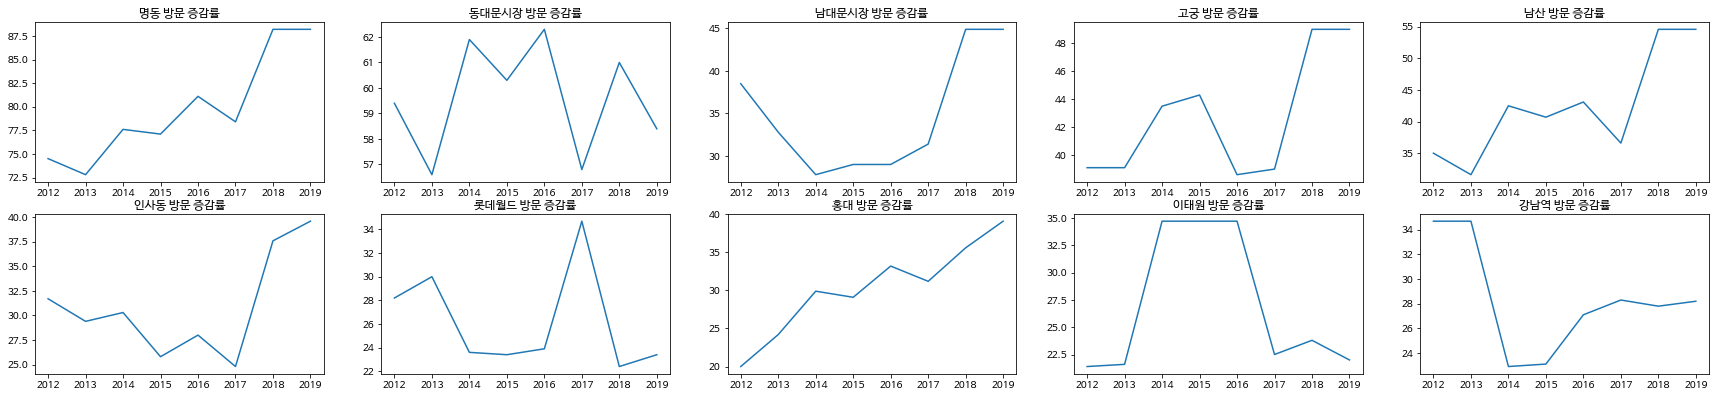

In [ ]:
plt.figure(figsize=(30,10))
n=1
for place in y_sel_df.columns[3:]:
    #print(place)
    ax = plt.subplot(3,5,n)
    plt.plot(y_sel_df['기간'], y_sel_df[place])
    plt.title(f'{place} 방문 증감률')
    n+=1
plt.show()

#### 계절별

In [ ]:
spring = m_sel_df2.loc[(m_sel_df2['월별'] == '3월')|(m_sel_df2['월별'] == '4월')|(m_sel_df2['월별'] == '5월')]
summer = m_sel_df2.loc[(m_sel_df2['월별'] == '6월')|(m_sel_df2['월별'] == '7월')|(m_sel_df2['월별'] == '8월')] 
fall = m_sel_df2.loc[(m_sel_df2['월별'] == '9월')|(m_sel_df2['월별'] == '10월')|(m_sel_df2['월별'] == '11월')] 
winter = m_sel_df2.loc[(m_sel_df2['월별'] == '12월')|(m_sel_df2['월별'] == '1월')|(m_sel_df2['월별'] == '2월')] 

In [ ]:
#봄
spring2= spring.append(round(spring.iloc[0:3].mean(),0),ignore_index=True)\
.append(round(spring.iloc[3:6].mean(),1),ignore_index=True)\
.append(round(spring.iloc[6:9].mean(),1),ignore_index=True)\
.append(round(spring.iloc[9:12].mean(),1),ignore_index=True)\
.append(round(spring.iloc[12:15].mean(),1),ignore_index=True)\
.append(round(spring.iloc[15:18].mean(),1),ignore_index=True)\
.append(round(spring.iloc[18:21].mean(),1),ignore_index=True)\
.append(round(spring.iloc[21:24].mean(),1),ignore_index=True)
new_spring = spring2.tail(8)

In [ ]:
#여름
summer2= summer.append(round(summer.iloc[0:3].mean(),0),ignore_index=True)\
.append(round(summer.iloc[3:6].mean(),1),ignore_index=True)\
.append(round(summer.iloc[6:9].mean(),1),ignore_index=True)\
.append(round(summer.iloc[9:12].mean(),1),ignore_index=True)\
.append(round(summer.iloc[12:15].mean(),1),ignore_index=True)\
.append(round(summer.iloc[15:18].mean(),1),ignore_index=True)\
.append(round(summer.iloc[18:21].mean(),1),ignore_index=True)\
.append(round(summer.iloc[21:24].mean(),1),ignore_index=True)
new_summer = summer2.tail(8)

In [ ]:
#가을
fall2= fall.append(round(fall.iloc[0:3].mean(),0),ignore_index=True)\
.append(round(fall.iloc[3:6].mean(),1),ignore_index=True)\
.append(round(fall.iloc[6:9].mean(),1),ignore_index=True)\
.append(round(fall.iloc[9:12].mean(),1),ignore_index=True)\
.append(round(fall.iloc[12:15].mean(),1),ignore_index=True)\
.append(round(fall.iloc[15:18].mean(),1),ignore_index=True)\
.append(round(fall.iloc[18:21].mean(),1),ignore_index=True)\
.append(round(fall.iloc[21:24].mean(),1),ignore_index=True)
new_fall = fall2.tail(8)

In [ ]:
#겨울
winter2= winter.append(round(winter.iloc[0:3].mean(),0),ignore_index=True)\
.append(round(winter.iloc[3:6].mean(),1),ignore_index=True)\
.append(round(winter.iloc[6:9].mean(),1),ignore_index=True)\
.append(round(winter.iloc[9:12].mean(),1),ignore_index=True)\
.append(round(winter.iloc[12:15].mean(),1),ignore_index=True)\
.append(round(winter.iloc[15:18].mean(),1),ignore_index=True)\
.append(round(winter.iloc[18:21].mean(),1),ignore_index=True)\
.append(round(winter.iloc[21:24].mean(),1),ignore_index=True)
new_winter = winter2.tail(8)

In [ ]:
new_spring = new_spring.drop(['월별'], axis=1)
new_spring['기간'] = new_spring['기간'].astype('int')
new_spring['기간']= pd.to_datetime(new_spring['기간'], format='%Y')
new_spring

In [ ]:
new_summer = new_summer.drop(['월별'], axis=1)
new_summer['기간'] = new_summer['기간'].astype('int')
new_summer['기간']= pd.to_datetime(new_summer['기간'], format='%Y')
new_summer

In [ ]:
new_fall = new_fall.drop(['월별'], axis=1)
new_fall['기간'] = new_fall['기간'].astype('int')
new_fall['기간']= pd.to_datetime(new_fall['기간'], format='%Y')
new_fall

In [ ]:
new_winter = new_winter.drop(['월별'], axis=1)
new_winter['기간'] = new_winter['기간'].astype('int')
new_winter['기간']= pd.to_datetime(new_winter['기간'], format='%Y')
new_winter

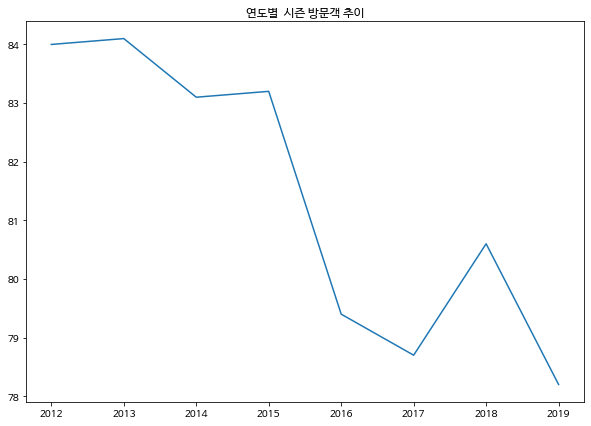

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(new_spring['기간'], new_spring['서울방문'])
plt.title('연도별  봄시즌 방문객 추이')
plt.show()

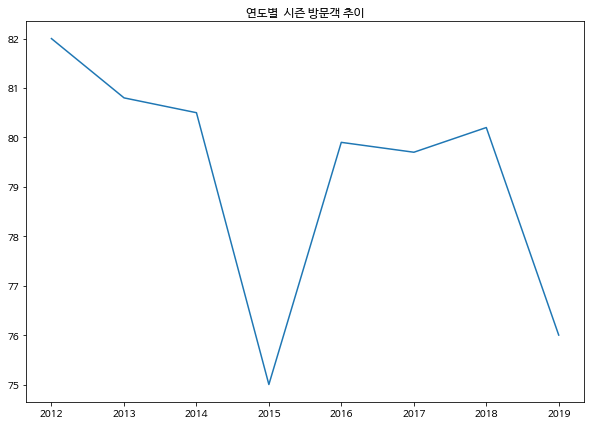

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(new_summer['기간'], new_spring['서울방문'])
plt.title('연도별  여름시즌 방문객 추이')
plt.show()

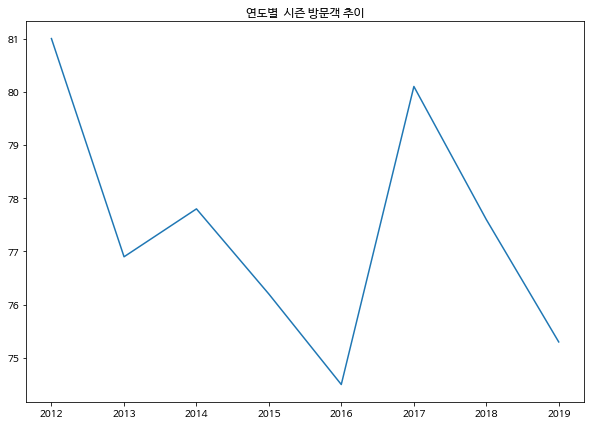

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(new_fall['기간'], new_fall['서울방문'])
plt.title('연도별  가을시즌 방문객 추이')
plt.show()

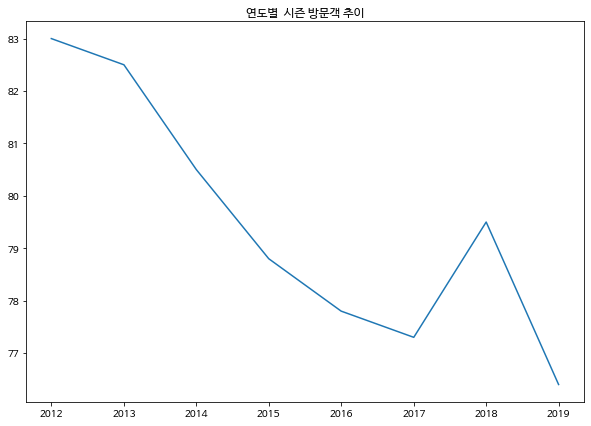

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(new_winter['기간'], new_winter['서울방문'])
plt.title('연도별  겨울시즌 방문객 추이')
plt.show()